**Here are the steps taken in order to clean the images. The cleaning steps are implemented in images in which more than 1 face is detected. For example, I want to build an authentication application for David Beckham, and I need to train an image which contains him and his bodyguard. I should be cognizant enough in retaining only David Beckham's face while eliminating his bodyguard's face from the image, or else it could lead to blunders.**

# Setting the path

In [0]:
import os
import glob
import shutil

In [0]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
pd.set_option('max_colwidth', -1)

In [4]:
%cd drive/

/content/drive


In [5]:
%cd My\ Drive

/content/drive/My Drive


In [6]:
%cd case\ studies\ 2

/content/drive/My Drive/case studies 2


In [7]:
!ls

'1-Gathering Data.ipynb'	       'Data Augmentation'
'2-Gathering files information.ipynb'  'Face Dataset'
'3-Data Pre-Processing.ipynb'	        Final_Face_Dataset
'4-Gathering Raw Waveforms.ipynb'       mel_spectrograms
'5-Concatenating Raw Waveforms.ipynb'   raw_data


In [8]:
%cd Final_Face_Dataset/

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [9]:
%cd MTCNN\ experiments

/content/drive/My Drive/case studies 2/Final_Face_Dataset/MTCNN experiments


In [10]:
!ls

 0_10000_training       concatenated_training
 10000_20000_training  'Cropped Images Data Concatenation.ipynb'
 20000_30000_training  'Data Cleaning.ipynb'
 30000_40000_training  'Face Detection Using MTCNN.ipynb'
 concatenated_testing   testing


In [11]:
%cd concatenated_training/

/content/drive/My Drive/case studies 2/Final_Face_Dataset/MTCNN experiments/concatenated_training


In [12]:
!ls

cleaned_images.csv  cropped_images.npy		 python_delete_3_faces.py
cleaned_images.npy  cropped_training_images.csv


In [0]:
training_df = pd.read_csv('cropped_training_images.csv')
training_cropped_images = np.load('cropped_images.npy', allow_pickle=True)

In [0]:
len(training_df)

48380

In [0]:
len(training_cropped_images)

48380

In [0]:
training_df.head()

,Unnamed: 0,label,image,faces_found
0,0,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_6007.jpg,2
1,1,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_6007.jpg,2
2,2,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_8892.jpg,1
3,3,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_7536.jpg,1
4,4,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_8708.jpg,1


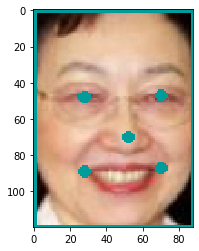

In [0]:
plt.imshow(training_cropped_images[0])

In [0]:
training_df.tail()

,Unnamed: 0,label,image,faces_found
48375,48375,Abdullah_Gul,Abdullah_Gul - _0_6979.jpg,2
48376,48376,Abdullah_Gul,Abdullah_Gul - _0_1112.jpg,2
48377,48377,Abdullah_Gul,Abdullah_Gul - _0_1112.jpg,2
48378,48378,Abdullah_Gul,Abdullah_Gul - _0_6844.jpg,2
48379,48379,Abdullah_Gul,Abdullah_Gul - _0_6844.jpg,2


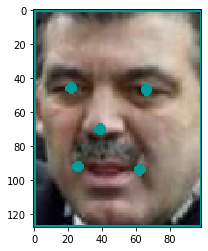

In [0]:
plt.imshow(training_cropped_images[48378])

In [0]:
training_df.head()

,Unnamed: 0,label,image,faces_found
0,0,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_6007.jpg,2
1,1,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_6007.jpg,2
2,2,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_8892.jpg,1
3,3,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_7536.jpg,1
4,4,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_8708.jpg,1


In [0]:
training_df['faces_found'].unique()

array([2, 1, 4, 3, 5])

# Cleaning images with 5 faces detected in it

In [0]:
training_df.loc[training_df['faces_found'] == 5]['image'].value_counts(dropna = False)

Abdullah_Gul - _0_362.jpg              5
Megawati_Sukarnoputri - _0_2672.jpg    5
Megawati_Sukarnoputri - _0_2630.jpg    5
Megawati_Sukarnoputri - _0_9842.jpg    5
Megawati_Sukarnoputri - _0_3575.jpg    5
Megawati_Sukarnoputri - _0_5920.jpg    5
Megawati_Sukarnoputri - _0_9993.jpg    5
Megawati_Sukarnoputri - _0_7903.jpg    5
Megawati_Sukarnoputri - _0_2524.jpg    5
Name: image, dtype: int64

In [0]:
index = list(training_df.loc[training_df['image'] == 'Abdullah_Gul - _0_362.jpg'].index)
index

[48318, 48319, 48320, 48321, 48322]

ValueError: ignored

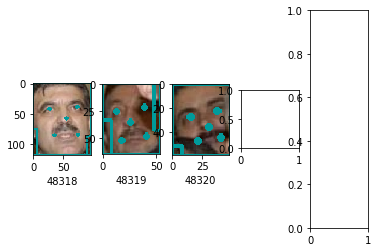

In [0]:
fig, ax = plt.subplots(1,5)
ax[0].imshow(training_cropped_images[index[0]])
ax[0].set_xlabel(index[0])
ax[1].imshow(training_cropped_images[index[1]])
ax[1].set_xlabel(index[1])
ax[2].imshow(training_cropped_images[index[2]])
ax[2].set_xlabel(index[2])
ax[3].imshow(training_cropped_images[index[3]])
ax[3].set_xlabel(index[3])
ax[4].imshow(training_cropped_images[index[4]])
ax[4].set_xlabel(index[4])

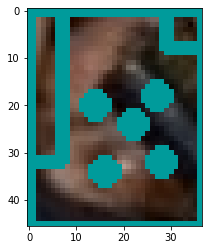

In [0]:
plt.imshow(training_cropped_images[index[4]])

In [0]:
training_df.loc[training_df['image'].str.contains('Abdullah')]

,Unnamed: 0,label,image,faces_found
47953,47953,Abdullah_Gul,Abdullah_Gul - _0_2768.jpg,1
47954,47954,Abdullah_Gul,Abdullah_Gul - _0_9523.jpg,2
47955,47955,Abdullah_Gul,Abdullah_Gul - _0_9523.jpg,2
47956,47956,Abdullah_Gul,Abdullah_Gul - _0_7773.jpg,2
47957,47957,Abdullah_Gul,Abdullah_Gul - _0_7773.jpg,2
...,...,...,...,...
48375,48375,Abdullah_Gul,Abdullah_Gul - _0_6979.jpg,2
48376,48376,Abdullah_Gul,Abdullah_Gul - _0_1112.jpg,2
48377,48377,Abdullah_Gul,Abdullah_Gul - _0_1112.jpg,2
48378,48378,Abdullah_Gul,Abdullah_Gul - _0_6844.jpg,2


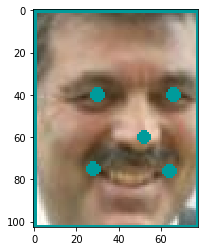

In [0]:
plt.imshow(training_cropped_images[47953])

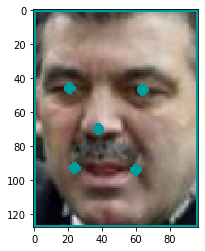

In [0]:
plt.imshow(training_cropped_images[48376])

In [0]:

del index[0]
index

[48319, 48320, 48321, 48322]

In [0]:
training_df.loc[training_df['faces_found'] == 5]['image'].value_counts(dropna = False)

Abdullah_Gul - _0_362.jpg              5
Megawati_Sukarnoputri - _0_2672.jpg    5
Megawati_Sukarnoputri - _0_2630.jpg    5
Megawati_Sukarnoputri - _0_9842.jpg    5
Megawati_Sukarnoputri - _0_3575.jpg    5
Megawati_Sukarnoputri - _0_5920.jpg    5
Megawati_Sukarnoputri - _0_9993.jpg    5
Megawati_Sukarnoputri - _0_7903.jpg    5
Megawati_Sukarnoputri - _0_2524.jpg    5
Name: image, dtype: int64

In [0]:
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

old array length:
48380
old dataframe length: 
48380
new array length: 
48376
new dataframe length: 
48376


In [0]:
training_df.loc[training_df['faces_found'] == 5]['image'].value_counts(dropna = False)

Megawati_Sukarnoputri - _0_2672.jpg    5
Megawati_Sukarnoputri - _0_2630.jpg    5
Megawati_Sukarnoputri - _0_9842.jpg    5
Megawati_Sukarnoputri - _0_3575.jpg    5
Megawati_Sukarnoputri - _0_5920.jpg    5
Megawati_Sukarnoputri - _0_9993.jpg    5
Megawati_Sukarnoputri - _0_7903.jpg    5
Megawati_Sukarnoputri - _0_2524.jpg    5
Abdullah_Gul - _0_362.jpg              1
Name: image, dtype: int64

In [0]:
index = list(training_df.loc[training_df['image'] == 'Megawati_Sukarnoputri - _0_2672.jpg'].index)
index

[17870, 17871, 17872, 17873, 17874]

Text(0.5, 0, '17874')

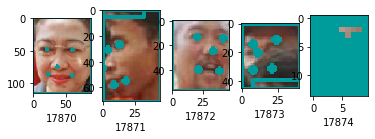

In [0]:
fig, ax = plt.subplots(1,5)
ax[0].imshow(training_cropped_images[index[0]])
ax[0].set_xlabel(index[0])
ax[1].imshow(training_cropped_images[index[1]])
ax[1].set_xlabel(index[1])
ax[2].imshow(training_cropped_images[index[2]])
ax[2].set_xlabel(index[2])
ax[3].imshow(training_cropped_images[index[3]])
ax[3].set_xlabel(index[3])
ax[4].imshow(training_cropped_images[index[4]])
ax[4].set_xlabel(index[4])

In [0]:
del index[0]
index

[17871, 17872, 17873, 17874]

In [0]:
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

old array length:
48376
old dataframe length: 
48376
new array length: 
48372
new dataframe length: 
48372


In [0]:
training_df.loc[training_df['faces_found'] == 5]['image'].value_counts(dropna = False)

Megawati_Sukarnoputri - _0_2630.jpg    5
Megawati_Sukarnoputri - _0_9842.jpg    5
Megawati_Sukarnoputri - _0_3575.jpg    5
Megawati_Sukarnoputri - _0_5920.jpg    5
Megawati_Sukarnoputri - _0_9993.jpg    5
Megawati_Sukarnoputri - _0_7903.jpg    5
Megawati_Sukarnoputri - _0_2524.jpg    5
Abdullah_Gul - _0_362.jpg              1
Megawati_Sukarnoputri - _0_2672.jpg    1
Name: image, dtype: int64

In [0]:
index = list(training_df.loc[training_df['image'] == 'Megawati_Sukarnoputri - _0_2630.jpg'].index)
index

[17963, 17964, 17965, 17966, 17967]

Text(0.5, 0, '17967')

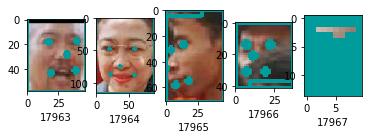

In [0]:
fig, ax = plt.subplots(1,5)
ax[0].imshow(training_cropped_images[index[0]])
ax[0].set_xlabel(index[0])
ax[1].imshow(training_cropped_images[index[1]])
ax[1].set_xlabel(index[1])
ax[2].imshow(training_cropped_images[index[2]])
ax[2].set_xlabel(index[2])
ax[3].imshow(training_cropped_images[index[3]])
ax[3].set_xlabel(index[3])
ax[4].imshow(training_cropped_images[index[4]])
ax[4].set_xlabel(index[4])

In [0]:
del index[1]
index

[17963, 17965, 17966, 17967]

In [0]:
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

old array length:
48372
old dataframe length: 
48372
new array length: 
48368
new dataframe length: 
48368


In [0]:
training_df.head()

,Unnamed: 0,label,image,faces_found
0,0,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_6007.jpg,2
1,1,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_6007.jpg,2
2,2,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_8892.jpg,1
3,3,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_7536.jpg,1
4,4,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_8708.jpg,1


In [0]:
del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))
training_df.head()

,Unnamed: 0,label,image,faces_found
0,0,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_6007.jpg,2
1,1,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_6007.jpg,2
2,2,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_8892.jpg,1
3,3,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_7536.jpg,1
4,4,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_8708.jpg,1


In [0]:
training_df.loc[training_df['faces_found'] == 5]['image'].value_counts(dropna = False)

Megawati_Sukarnoputri - _0_9842.jpg    5
Megawati_Sukarnoputri - _0_3575.jpg    5
Megawati_Sukarnoputri - _0_5920.jpg    5
Megawati_Sukarnoputri - _0_9993.jpg    5
Megawati_Sukarnoputri - _0_7903.jpg    5
Megawati_Sukarnoputri - _0_2524.jpg    5
Name: image, dtype: int64

In [0]:
index = list(training_df.loc[training_df['image'] == 'Megawati_Sukarnoputri - _0_9842.jpg'].index)
index

[17904, 17905, 17906, 17907, 17908]

Text(0.5, 0, '17908')

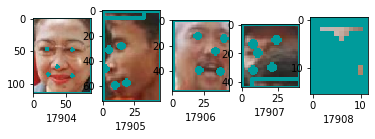

In [0]:
fig, ax = plt.subplots(1,5)
ax[0].imshow(training_cropped_images[index[0]])
ax[0].set_xlabel(index[0])
ax[1].imshow(training_cropped_images[index[1]])
ax[1].set_xlabel(index[1])
ax[2].imshow(training_cropped_images[index[2]])
ax[2].set_xlabel(index[2])
ax[3].imshow(training_cropped_images[index[3]])
ax[3].set_xlabel(index[3])
ax[4].imshow(training_cropped_images[index[4]])
ax[4].set_xlabel(index[4])

In [0]:
del index[0]
index

[17905, 17906, 17907, 17908]

In [0]:
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

old array length:
48368
old dataframe length: 
48368
new array length: 
48364
new dataframe length: 
48364


In [0]:
del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))
training_df.head()

,Unnamed: 0,label,image,faces_found
0,0,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_6007.jpg,2
1,1,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_6007.jpg,2
2,2,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_8892.jpg,1
3,3,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_7536.jpg,1
4,4,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_8708.jpg,1


In [0]:
x = input('Enter a number')

Enter a number5


In [0]:
x

'5'

In [0]:
training_df.loc[training_df['faces_found'] == int(x)]['image'].unique()

array(['Megawati_Sukarnoputri - _0_7903.jpg',
       'Megawati_Sukarnoputri - _0_2524.jpg',
       'Megawati_Sukarnoputri - _0_9993.jpg',
       'Megawati_Sukarnoputri - _0_5920.jpg',
       'Megawati_Sukarnoputri - _0_3575.jpg'], dtype=object)

In [0]:
y = input('Enter a number')

Enter a number0


In [0]:
y

'0'

In [0]:
z = training_df.loc[training_df['faces_found'] == int(x)]['image'].unique()[int(y)]

In [0]:
index = list(training_df.loc[training_df['image'] == z].index)
index

[17799, 17800, 17801, 17802, 17803]

Text(0.5, 0, '17803')

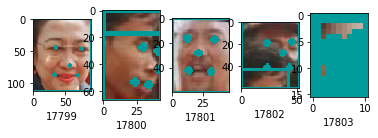

In [0]:
fig, ax = plt.subplots(1,5)
ax[0].imshow(training_cropped_images[index[0]])
ax[0].set_xlabel(index[0])
ax[1].imshow(training_cropped_images[index[1]])
ax[1].set_xlabel(index[1])
ax[2].imshow(training_cropped_images[index[2]])
ax[2].set_xlabel(index[2])
ax[3].imshow(training_cropped_images[index[3]])
ax[3].set_xlabel(index[3])
ax[4].imshow(training_cropped_images[index[4]])
ax[4].set_xlabel(index[4])

In [0]:
d = input('enter a number')

enter a number0


In [0]:
d

'0'

In [0]:
del index[int(d)]
index

[17800, 17801, 17802, 17803]

In [0]:
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

old array length:
48364
old dataframe length: 
48364
new array length: 
48360
new dataframe length: 
48360


In [0]:
a = input('Enter a number')
b = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()
print(b)

Enter a number5
['Megawati_Sukarnoputri - _0_2524.jpg'
 'Megawati_Sukarnoputri - _0_9993.jpg'
 'Megawati_Sukarnoputri - _0_5920.jpg'
 'Megawati_Sukarnoputri - _0_3575.jpg']


Enter a number5
['Megawati_Sukarnoputri - _0_2524.jpg'
 'Megawati_Sukarnoputri - _0_9993.jpg'
 'Megawati_Sukarnoputri - _0_5920.jpg'
 'Megawati_Sukarnoputri - _0_3575.jpg']
Enter a number0


Text(0.5, 0, '17850')

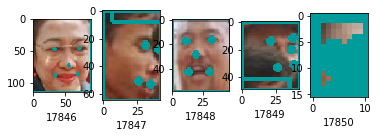

In [0]:
a = input('Enter a number')
b = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()
print(b)
c = input('Enter a number')
d = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()[int(c)]

index = list(training_df.loc[training_df['image'] == d].index)

fig, ax = plt.subplots(1,5)
ax[0].imshow(training_cropped_images[index[0]])
ax[0].set_xlabel(index[0])
ax[1].imshow(training_cropped_images[index[1]])
ax[1].set_xlabel(index[1])
ax[2].imshow(training_cropped_images[index[2]])
ax[2].set_xlabel(index[2])
ax[3].imshow(training_cropped_images[index[3]])
ax[3].set_xlabel(index[3])
ax[4].imshow(training_cropped_images[index[4]])
ax[4].set_xlabel(index[4])

In [0]:
e = input('enter a number to be deleted')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

enter a number to be deleted0
old array length:
48360
old dataframe length: 
48360
new array length: 
48356
new dataframe length: 
48356


Enter a number5
['Megawati_Sukarnoputri - _0_9993.jpg'
 'Megawati_Sukarnoputri - _0_5920.jpg'
 'Megawati_Sukarnoputri - _0_3575.jpg']
Enter a number0


Text(0.5, 0, '17895')

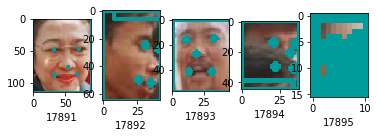

In [0]:
a = input('Enter a number')
b = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()
print(b)
c = input('Enter a number')
d = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()[int(c)]

index = list(training_df.loc[training_df['image'] == d].index)

fig, ax = plt.subplots(1,5)
ax[0].imshow(training_cropped_images[index[0]])
ax[0].set_xlabel(index[0])
ax[1].imshow(training_cropped_images[index[1]])
ax[1].set_xlabel(index[1])
ax[2].imshow(training_cropped_images[index[2]])
ax[2].set_xlabel(index[2])
ax[3].imshow(training_cropped_images[index[3]])
ax[3].set_xlabel(index[3])
ax[4].imshow(training_cropped_images[index[4]])
ax[4].set_xlabel(index[4])

In [0]:
e = input('enter a number to be deleted')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

enter a number to be deleted0
old array length:
48356
old dataframe length: 
48356
new array length: 
48352
new dataframe length: 
48352


Enter a number5
['Megawati_Sukarnoputri - _0_5920.jpg'
 'Megawati_Sukarnoputri - _0_3575.jpg']
Enter a number0


ValueError: ignored

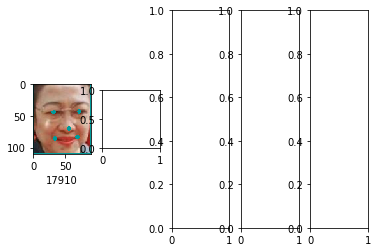

In [0]:
a = input('Enter a number')
b = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()
print(b)
c = input('Enter a number')
d = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()[int(c)]

index = list(training_df.loc[training_df['image'] == d].index)

fig, ax = plt.subplots(1,5)
ax[0].imshow(training_cropped_images[index[0]])
ax[0].set_xlabel(index[0])
ax[1].imshow(training_cropped_images[index[1]])
ax[1].set_xlabel(index[1])
ax[2].imshow(training_cropped_images[index[2]])
ax[2].set_xlabel(index[2])
ax[3].imshow(training_cropped_images[index[3]])
ax[3].set_xlabel(index[3])
ax[4].imshow(training_cropped_images[index[4]])
ax[4].set_xlabel(index[4])

In [0]:
e = input('enter a number to be deleted')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

enter a number to be deleted0
old array length:
48352
old dataframe length: 
48352
new array length: 
48348
new dataframe length: 
48348


Enter a number5
['Megawati_Sukarnoputri - _0_3575.jpg']
Enter a number0


Text(0.5, 0, '17992')

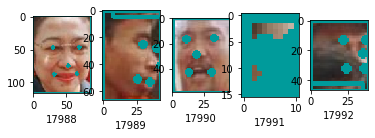

In [0]:
a = input('Enter a number')
b = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()
print(b)
c = input('Enter a number')
d = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()[int(c)]

index = list(training_df.loc[training_df['image'] == d].index)

fig, ax = plt.subplots(1,5)
ax[0].imshow(training_cropped_images[index[0]])
ax[0].set_xlabel(index[0])
ax[1].imshow(training_cropped_images[index[1]])
ax[1].set_xlabel(index[1])
ax[2].imshow(training_cropped_images[index[2]])
ax[2].set_xlabel(index[2])
ax[3].imshow(training_cropped_images[index[3]])
ax[3].set_xlabel(index[3])
ax[4].imshow(training_cropped_images[index[4]])
ax[4].set_xlabel(index[4])

In [0]:
e = input('enter a number to be deleted')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

enter a number to be deleted0
old array length:
48348
old dataframe length: 
48348
new array length: 
48344
new dataframe length: 
48344


In [0]:
training_df.loc[training_df['faces_found'] == 5]

,Unnamed: 0,label,image,faces_found


In [0]:
training_df['faces_found'].unique()

array([2, 1, 4, 3])

# Cleaning images with 3 faces detected in it

Enter a number3
['Winona_Ryder - _0_9949.jpg' 'Winona_Ryder - _0_3585.jpg'
 'Winona_Ryder - _0_7500.jpg' 'Winona_Ryder - _0_3785.jpg'
 'Winona_Ryder - _0_5437.jpg' 'Winona_Ryder - _0_452.jpg'
 'Winona_Ryder - _0_5950.jpg' 'Winona_Ryder - _0_5789.jpg'
 'Winona_Ryder - _0_5432.jpg' 'Winona_Ryder - _0_5216.jpg'
 'Walter_Mondale - _0_2589.jpg' 'Walter_Mondale - _0_8622.jpg'
 'Walter_Mondale - _0_9186.jpg' 'Walter_Mondale - _0_3980.jpg'
 'Walter_Mondale - _0_5107.jpg' 'Walter_Mondale - _0_7009.jpg'
 'Venus_Williams - _0_5879.jpg' 'Vaclav_Havel - _0_2941.jpg'
 'Tung_Chee-hwa - _0_2449.jpg' 'Trent_Lott - _0_1031.jpg'
 'Tommy_Franks - _0_6034.jpg' 'Tommy_Franks - _0_9883.jpg'
 'Tommy_Franks - _0_2102.jpg' 'Tommy_Franks - _0_1501.jpg'
 'Tommy_Franks - _0_9432.jpg' 'Tommy_Franks - _0_2338.jpg'
 'Tommy_Franks - _0_4487.jpg' 'Tommy_Franks - _0_3433.jpg'
 'Tommy_Franks - _0_2348.jpg' 'Tommy_Franks - _0_6568.jpg'
 'Tommy_Franks - _0_7416.jpg' 'Tommy_Franks - _0_4646.jpg'
 'Tommy_Franks - _0_6753.jpg

Text(0.5, 0, '333')

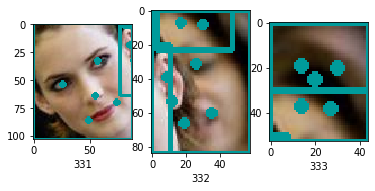

In [0]:
a = input('Enter a number')
b = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()
print(b)
c = input('Enter a number')
d = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()[int(c)]

index = list(training_df.loc[training_df['image'] == d].index)

fig, ax = plt.subplots(1,3)
ax[0].imshow(training_cropped_images[index[0]])
ax[0].set_xlabel(index[0])
ax[1].imshow(training_cropped_images[index[1]])
ax[1].set_xlabel(index[1])
ax[2].imshow(training_cropped_images[index[2]])
ax[2].set_xlabel(index[2])

In [0]:
e = input('enter a number to be deleted')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

enter a number to be deleted0
old array length:
48344
old dataframe length: 
48344
new array length: 
48342
new dataframe length: 
48342


In [0]:
!pwd

/content/drive/My Drive/case studies 2/Final_Face_Dataset/MTCNN experiments/concatenated_training


Enter a number3
['Winona_Ryder - _0_3585.jpg' 'Winona_Ryder - _0_7500.jpg'
 'Winona_Ryder - _0_3785.jpg' 'Winona_Ryder - _0_5437.jpg'
 'Winona_Ryder - _0_452.jpg' 'Winona_Ryder - _0_5950.jpg'
 'Winona_Ryder - _0_5789.jpg' 'Winona_Ryder - _0_5432.jpg'
 'Winona_Ryder - _0_5216.jpg' 'Walter_Mondale - _0_2589.jpg'
 'Walter_Mondale - _0_8622.jpg' 'Walter_Mondale - _0_9186.jpg'
 'Walter_Mondale - _0_3980.jpg' 'Walter_Mondale - _0_5107.jpg'
 'Walter_Mondale - _0_7009.jpg' 'Venus_Williams - _0_5879.jpg'
 'Vaclav_Havel - _0_2941.jpg' 'Tung_Chee-hwa - _0_2449.jpg'
 'Trent_Lott - _0_1031.jpg' 'Tommy_Franks - _0_6034.jpg'
 'Tommy_Franks - _0_9883.jpg' 'Tommy_Franks - _0_2102.jpg'
 'Tommy_Franks - _0_1501.jpg' 'Tommy_Franks - _0_9432.jpg'
 'Tommy_Franks - _0_2338.jpg' 'Tommy_Franks - _0_4487.jpg'
 'Tommy_Franks - _0_3433.jpg' 'Tommy_Franks - _0_2348.jpg'
 'Tommy_Franks - _0_6568.jpg' 'Tommy_Franks - _0_7416.jpg'
 'Tommy_Franks - _0_4646.jpg' 'Tommy_Franks - _0_6753.jpg'
 'Tommy_Franks - _0_3040.jpg

Text(0.5, 0, '409')

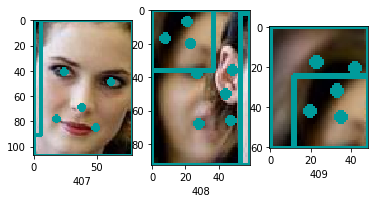

In [0]:
a = input('Enter a number')
b = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()
print(b)
c = input('Enter a number')
d = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()[int(c)]

index = list(training_df.loc[training_df['image'] == d].index)

fig, ax = plt.subplots(1,3)
ax[0].imshow(training_cropped_images[index[0]])
ax[0].set_xlabel(index[0])
ax[1].imshow(training_cropped_images[index[1]])
ax[1].set_xlabel(index[1])
ax[2].imshow(training_cropped_images[index[2]])
ax[2].set_xlabel(index[2])

In [0]:
e = input('enter a number to be deleted')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

enter a number to be deleted0
old array length:
48342
old dataframe length: 
48342
new array length: 
48340
new dataframe length: 
48340


Enter a number3
['Winona_Ryder - _0_7500.jpg' 'Winona_Ryder - _0_3785.jpg'
 'Winona_Ryder - _0_5437.jpg' 'Winona_Ryder - _0_452.jpg'
 'Winona_Ryder - _0_5950.jpg' 'Winona_Ryder - _0_5789.jpg'
 'Winona_Ryder - _0_5432.jpg' 'Winona_Ryder - _0_5216.jpg'
 'Walter_Mondale - _0_2589.jpg' 'Walter_Mondale - _0_8622.jpg'
 'Walter_Mondale - _0_9186.jpg' 'Walter_Mondale - _0_3980.jpg'
 'Walter_Mondale - _0_5107.jpg' 'Walter_Mondale - _0_7009.jpg'
 'Venus_Williams - _0_5879.jpg' 'Vaclav_Havel - _0_2941.jpg'
 'Tung_Chee-hwa - _0_2449.jpg' 'Trent_Lott - _0_1031.jpg'
 'Tommy_Franks - _0_6034.jpg' 'Tommy_Franks - _0_9883.jpg'
 'Tommy_Franks - _0_2102.jpg' 'Tommy_Franks - _0_1501.jpg'
 'Tommy_Franks - _0_9432.jpg' 'Tommy_Franks - _0_2338.jpg'
 'Tommy_Franks - _0_4487.jpg' 'Tommy_Franks - _0_3433.jpg'
 'Tommy_Franks - _0_2348.jpg' 'Tommy_Franks - _0_6568.jpg'
 'Tommy_Franks - _0_7416.jpg' 'Tommy_Franks - _0_4646.jpg'
 'Tommy_Franks - _0_6753.jpg' 'Tommy_Franks - _0_3040.jpg'
 'Tommy_Franks - _0_7672.jpg

Text(0.5, 0, '410')

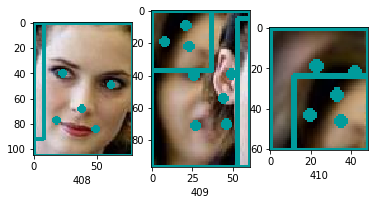

In [0]:
a = input('Enter a number')
b = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()
print(b)
c = input('Enter a number')
d = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()[int(c)]

index = list(training_df.loc[training_df['image'] == d].index)

fig, ax = plt.subplots(1,3)
ax[0].imshow(training_cropped_images[index[0]])
ax[0].set_xlabel(index[0])
ax[1].imshow(training_cropped_images[index[1]])
ax[1].set_xlabel(index[1])
ax[2].imshow(training_cropped_images[index[2]])
ax[2].set_xlabel(index[2])

In [0]:
e = input('enter a number to be deleted')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

enter a number to be deleted0
old array length:
48340
old dataframe length: 
48340
new array length: 
48338
new dataframe length: 
48338


Enter a number3
['Winona_Ryder - _0_3785.jpg' 'Winona_Ryder - _0_5437.jpg'
 'Winona_Ryder - _0_452.jpg' 'Winona_Ryder - _0_5950.jpg'
 'Winona_Ryder - _0_5789.jpg' 'Winona_Ryder - _0_5432.jpg'
 'Winona_Ryder - _0_5216.jpg' 'Walter_Mondale - _0_2589.jpg'
 'Walter_Mondale - _0_8622.jpg' 'Walter_Mondale - _0_9186.jpg'
 'Walter_Mondale - _0_3980.jpg' 'Walter_Mondale - _0_5107.jpg'
 'Walter_Mondale - _0_7009.jpg' 'Venus_Williams - _0_5879.jpg'
 'Vaclav_Havel - _0_2941.jpg' 'Tung_Chee-hwa - _0_2449.jpg'
 'Trent_Lott - _0_1031.jpg' 'Tommy_Franks - _0_6034.jpg'
 'Tommy_Franks - _0_9883.jpg' 'Tommy_Franks - _0_2102.jpg'
 'Tommy_Franks - _0_1501.jpg' 'Tommy_Franks - _0_9432.jpg'
 'Tommy_Franks - _0_2338.jpg' 'Tommy_Franks - _0_4487.jpg'
 'Tommy_Franks - _0_3433.jpg' 'Tommy_Franks - _0_2348.jpg'
 'Tommy_Franks - _0_6568.jpg' 'Tommy_Franks - _0_7416.jpg'
 'Tommy_Franks - _0_4646.jpg' 'Tommy_Franks - _0_6753.jpg'
 'Tommy_Franks - _0_3040.jpg' 'Tommy_Franks - _0_7672.jpg'
 'Tommy_Franks - _0_8988.jpg

ValueError: ignored

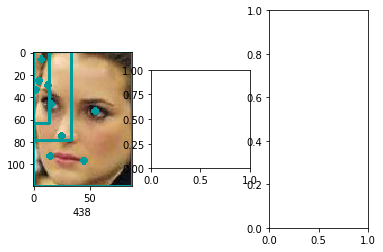

In [0]:
a = input('Enter a number')
b = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()
print(b)
c = input('Enter a number')
d = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()[int(c)]

index = list(training_df.loc[training_df['image'] == d].index)

fig, ax = plt.subplots(1,3)
ax[0].imshow(training_cropped_images[index[0]])
ax[0].set_xlabel(index[0])
ax[1].imshow(training_cropped_images[index[1]])
ax[1].set_xlabel(index[1])
ax[2].imshow(training_cropped_images[index[2]])
ax[2].set_xlabel(index[2])


In [0]:
e = input('enter a number to be deleted')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

enter a number to be deleted0
old array length:
48338
old dataframe length: 
48338
new array length: 
48336
new dataframe length: 
48336


Number of faces in the image3
['Winona_Ryder - _0_5437.jpg' 'Winona_Ryder - _0_452.jpg'
 'Winona_Ryder - _0_5950.jpg' 'Winona_Ryder - _0_5789.jpg'
 'Winona_Ryder - _0_5432.jpg' 'Winona_Ryder - _0_5216.jpg'
 'Walter_Mondale - _0_2589.jpg' 'Walter_Mondale - _0_8622.jpg'
 'Walter_Mondale - _0_9186.jpg' 'Walter_Mondale - _0_3980.jpg'
 'Walter_Mondale - _0_5107.jpg' 'Walter_Mondale - _0_7009.jpg'
 'Venus_Williams - _0_5879.jpg' 'Vaclav_Havel - _0_2941.jpg'
 'Tung_Chee-hwa - _0_2449.jpg' 'Trent_Lott - _0_1031.jpg'
 'Tommy_Franks - _0_6034.jpg' 'Tommy_Franks - _0_9883.jpg'
 'Tommy_Franks - _0_2102.jpg' 'Tommy_Franks - _0_1501.jpg'
 'Tommy_Franks - _0_9432.jpg' 'Tommy_Franks - _0_2338.jpg'
 'Tommy_Franks - _0_4487.jpg' 'Tommy_Franks - _0_3433.jpg'
 'Tommy_Franks - _0_2348.jpg' 'Tommy_Franks - _0_6568.jpg'
 'Tommy_Franks - _0_7416.jpg' 'Tommy_Franks - _0_4646.jpg'
 'Tommy_Franks - _0_6753.jpg' 'Tommy_Franks - _0_3040.jpg'
 'Tommy_Franks - _0_7672.jpg' 'Tommy_Franks - _0_8988.jpg'
 'Tommy_Franks

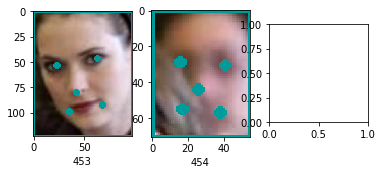

In [0]:
a = input('Number of faces in the image')
b = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()
print(b)
c = input('Index position of the image in the dataframe')
d = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()[int(c)]

index = list(training_df.loc[training_df['image'] == d].index)

try:
	fig, ax = plt.subplots(1,3)
	ax[0].imshow(training_cropped_images[index[0]])
	ax[0].set_xlabel(index[0])
	ax[1].imshow(training_cropped_images[index[1]])
	ax[1].set_xlabel(index[1])
	ax[2].imshow(training_cropped_images[index[2]])
	ax[2].set_xlabel(index[2])
except Exception as e:
	pass


In [0]:
e = input('index position of the above image to be retained')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

index position of the above image to be retained0
old array length:
48336
old dataframe length: 
48336
new array length: 
48334
new dataframe length: 
48334


Number of faces in the image3
['Winona_Ryder - _0_452.jpg' 'Winona_Ryder - _0_5950.jpg'
 'Winona_Ryder - _0_5789.jpg' 'Winona_Ryder - _0_5432.jpg'
 'Winona_Ryder - _0_5216.jpg' 'Walter_Mondale - _0_2589.jpg'
 'Walter_Mondale - _0_8622.jpg' 'Walter_Mondale - _0_9186.jpg'
 'Walter_Mondale - _0_3980.jpg' 'Walter_Mondale - _0_5107.jpg'
 'Walter_Mondale - _0_7009.jpg' 'Venus_Williams - _0_5879.jpg'
 'Vaclav_Havel - _0_2941.jpg' 'Tung_Chee-hwa - _0_2449.jpg'
 'Trent_Lott - _0_1031.jpg' 'Tommy_Franks - _0_6034.jpg'
 'Tommy_Franks - _0_9883.jpg' 'Tommy_Franks - _0_2102.jpg'
 'Tommy_Franks - _0_1501.jpg' 'Tommy_Franks - _0_9432.jpg'
 'Tommy_Franks - _0_2338.jpg' 'Tommy_Franks - _0_4487.jpg'
 'Tommy_Franks - _0_3433.jpg' 'Tommy_Franks - _0_2348.jpg'
 'Tommy_Franks - _0_6568.jpg' 'Tommy_Franks - _0_7416.jpg'
 'Tommy_Franks - _0_4646.jpg' 'Tommy_Franks - _0_6753.jpg'
 'Tommy_Franks - _0_3040.jpg' 'Tommy_Franks - _0_7672.jpg'
 'Tommy_Franks - _0_8988.jpg' 'Tommy_Franks - _0_3765.jpg'
 'Tommy_Franks

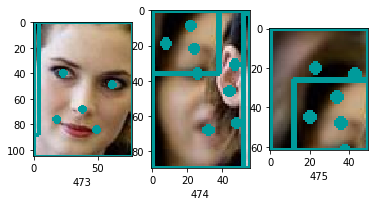

In [0]:
a = input('Number of faces in the image')
b = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()
print(b)
c = input('Index position of the image in the dataframe')
d = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()[int(c)]

index = list(training_df.loc[training_df['image'] == d].index)

try:
	fig, ax = plt.subplots(1,3)
	ax[0].imshow(training_cropped_images[index[0]])
	ax[0].set_xlabel(index[0])
	ax[1].imshow(training_cropped_images[index[1]])
	ax[1].set_xlabel(index[1])
	ax[2].imshow(training_cropped_images[index[2]])
	ax[2].set_xlabel(index[2])
except Exception as e:
	pass

In [0]:
e = input('index position to be retained from the above image')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

index position to be retained from the above image0
old array length:
48334
old dataframe length: 
48334
new array length: 
48332
new dataframe length: 
48332


Number of faces in the image3
['Winona_Ryder - _0_5950.jpg' 'Winona_Ryder - _0_5789.jpg'
 'Winona_Ryder - _0_5432.jpg' 'Winona_Ryder - _0_5216.jpg'
 'Walter_Mondale - _0_2589.jpg' 'Walter_Mondale - _0_8622.jpg'
 'Walter_Mondale - _0_9186.jpg' 'Walter_Mondale - _0_3980.jpg'
 'Walter_Mondale - _0_5107.jpg' 'Walter_Mondale - _0_7009.jpg'
 'Venus_Williams - _0_5879.jpg' 'Vaclav_Havel - _0_2941.jpg'
 'Tung_Chee-hwa - _0_2449.jpg' 'Trent_Lott - _0_1031.jpg'
 'Tommy_Franks - _0_6034.jpg' 'Tommy_Franks - _0_9883.jpg'
 'Tommy_Franks - _0_2102.jpg' 'Tommy_Franks - _0_1501.jpg'
 'Tommy_Franks - _0_9432.jpg' 'Tommy_Franks - _0_2338.jpg'
 'Tommy_Franks - _0_4487.jpg' 'Tommy_Franks - _0_3433.jpg'
 'Tommy_Franks - _0_2348.jpg' 'Tommy_Franks - _0_6568.jpg'
 'Tommy_Franks - _0_7416.jpg' 'Tommy_Franks - _0_4646.jpg'
 'Tommy_Franks - _0_6753.jpg' 'Tommy_Franks - _0_3040.jpg'
 'Tommy_Franks - _0_7672.jpg' 'Tommy_Franks - _0_8988.jpg'
 'Tommy_Franks - _0_3765.jpg' 'Tommy_Franks - _0_6875.jpg'
 'Tommy_Frank

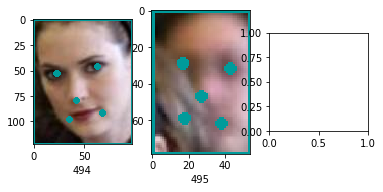

In [0]:
a = input('Number of faces in the image')
b = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()
print(b)
c = input('Index position of the image in the dataframe')
d = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()[int(c)]

index = list(training_df.loc[training_df['image'] == d].index)

try:
	fig, ax = plt.subplots(1,3)
	ax[0].imshow(training_cropped_images[index[0]])
	ax[0].set_xlabel(index[0])
	ax[1].imshow(training_cropped_images[index[1]])
	ax[1].set_xlabel(index[1])
	ax[2].imshow(training_cropped_images[index[2]])
	ax[2].set_xlabel(index[2])
except Exception as e:
	pass


In [0]:
e = input('index position to be retained from the above image')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

index position to be retained from the above image0
old array length:
48332
old dataframe length: 
48332
new array length: 
48330
new dataframe length: 
48330


Number of faces in the image3
['Winona_Ryder - _0_5789.jpg' 'Winona_Ryder - _0_5432.jpg'
 'Winona_Ryder - _0_5216.jpg' 'Walter_Mondale - _0_2589.jpg'
 'Walter_Mondale - _0_8622.jpg' 'Walter_Mondale - _0_9186.jpg'
 'Walter_Mondale - _0_3980.jpg' 'Walter_Mondale - _0_5107.jpg'
 'Walter_Mondale - _0_7009.jpg' 'Venus_Williams - _0_5879.jpg'
 'Vaclav_Havel - _0_2941.jpg' 'Tung_Chee-hwa - _0_2449.jpg'
 'Trent_Lott - _0_1031.jpg' 'Tommy_Franks - _0_6034.jpg'
 'Tommy_Franks - _0_9883.jpg' 'Tommy_Franks - _0_2102.jpg'
 'Tommy_Franks - _0_1501.jpg' 'Tommy_Franks - _0_9432.jpg'
 'Tommy_Franks - _0_2338.jpg' 'Tommy_Franks - _0_4487.jpg'
 'Tommy_Franks - _0_3433.jpg' 'Tommy_Franks - _0_2348.jpg'
 'Tommy_Franks - _0_6568.jpg' 'Tommy_Franks - _0_7416.jpg'
 'Tommy_Franks - _0_4646.jpg' 'Tommy_Franks - _0_6753.jpg'
 'Tommy_Franks - _0_3040.jpg' 'Tommy_Franks - _0_7672.jpg'
 'Tommy_Franks - _0_8988.jpg' 'Tommy_Franks - _0_3765.jpg'
 'Tommy_Franks - _0_6875.jpg' 'Tommy_Franks - _0_7971.jpg'
 'Tommy_Frank

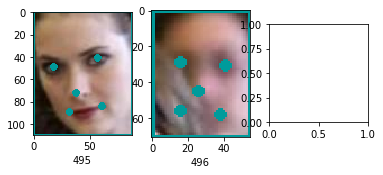

In [0]:
a = input('Number of faces in the image')
b = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()
print(b)
c = input('Index position of the image in the dataframe')
d = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()[int(c)]

index = list(training_df.loc[training_df['image'] == d].index)

try:
	fig, ax = plt.subplots(1,3)
	ax[0].imshow(training_cropped_images[index[0]])
	ax[0].set_xlabel(index[0])
	ax[1].imshow(training_cropped_images[index[1]])
	ax[1].set_xlabel(index[1])
	ax[2].imshow(training_cropped_images[index[2]])
	ax[2].set_xlabel(index[2])
except Exception as e:
	pass

In [0]:
e = input('index position to be retained from the above image')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

index position to be retained from the above image0
old array length:
48330
old dataframe length: 
48330
new array length: 
48328
new dataframe length: 
48328


Number of faces in the image3
['Winona_Ryder - _0_5432.jpg' 'Winona_Ryder - _0_5216.jpg'
 'Walter_Mondale - _0_2589.jpg' 'Walter_Mondale - _0_8622.jpg'
 'Walter_Mondale - _0_9186.jpg' 'Walter_Mondale - _0_3980.jpg'
 'Walter_Mondale - _0_5107.jpg' 'Walter_Mondale - _0_7009.jpg'
 'Venus_Williams - _0_5879.jpg' 'Vaclav_Havel - _0_2941.jpg'
 'Tung_Chee-hwa - _0_2449.jpg' 'Trent_Lott - _0_1031.jpg'
 'Tommy_Franks - _0_6034.jpg' 'Tommy_Franks - _0_9883.jpg'
 'Tommy_Franks - _0_2102.jpg' 'Tommy_Franks - _0_1501.jpg'
 'Tommy_Franks - _0_9432.jpg' 'Tommy_Franks - _0_2338.jpg'
 'Tommy_Franks - _0_4487.jpg' 'Tommy_Franks - _0_3433.jpg'
 'Tommy_Franks - _0_2348.jpg' 'Tommy_Franks - _0_6568.jpg'
 'Tommy_Franks - _0_7416.jpg' 'Tommy_Franks - _0_4646.jpg'
 'Tommy_Franks - _0_6753.jpg' 'Tommy_Franks - _0_3040.jpg'
 'Tommy_Franks - _0_7672.jpg' 'Tommy_Franks - _0_8988.jpg'
 'Tommy_Franks - _0_3765.jpg' 'Tommy_Franks - _0_6875.jpg'
 'Tommy_Franks - _0_7971.jpg' 'Tommy_Franks - _0_8530.jpg'
 'Tommy_Frank

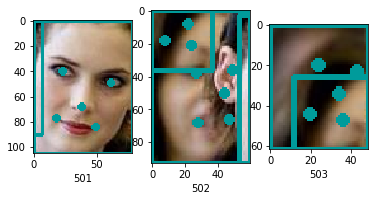

In [0]:
a = input('Number of faces in the image')
b = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()
print(b)
c = input('Index position of the image in the dataframe')
d = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()[int(c)]

index = list(training_df.loc[training_df['image'] == d].index)

try:
	fig, ax = plt.subplots(1,3)
	ax[0].imshow(training_cropped_images[index[0]])
	ax[0].set_xlabel(index[0])
	ax[1].imshow(training_cropped_images[index[1]])
	ax[1].set_xlabel(index[1])
	ax[2].imshow(training_cropped_images[index[2]])
	ax[2].set_xlabel(index[2])
except Exception as e:
	pass




In [0]:
e = input('index position to be retained from the above image')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

index position to be retained from the above image0
old array length:
48328
old dataframe length: 
48328
new array length: 
48326
new dataframe length: 
48326


Number of faces in the image3
['Winona_Ryder - _0_5216.jpg' 'Walter_Mondale - _0_2589.jpg'
 'Walter_Mondale - _0_8622.jpg' 'Walter_Mondale - _0_9186.jpg'
 'Walter_Mondale - _0_3980.jpg' 'Walter_Mondale - _0_5107.jpg'
 'Walter_Mondale - _0_7009.jpg' 'Venus_Williams - _0_5879.jpg'
 'Vaclav_Havel - _0_2941.jpg' 'Tung_Chee-hwa - _0_2449.jpg'
 'Trent_Lott - _0_1031.jpg' 'Tommy_Franks - _0_6034.jpg'
 'Tommy_Franks - _0_9883.jpg' 'Tommy_Franks - _0_2102.jpg'
 'Tommy_Franks - _0_1501.jpg' 'Tommy_Franks - _0_9432.jpg'
 'Tommy_Franks - _0_2338.jpg' 'Tommy_Franks - _0_4487.jpg'
 'Tommy_Franks - _0_3433.jpg' 'Tommy_Franks - _0_2348.jpg'
 'Tommy_Franks - _0_6568.jpg' 'Tommy_Franks - _0_7416.jpg'
 'Tommy_Franks - _0_4646.jpg' 'Tommy_Franks - _0_6753.jpg'
 'Tommy_Franks - _0_3040.jpg' 'Tommy_Franks - _0_7672.jpg'
 'Tommy_Franks - _0_8988.jpg' 'Tommy_Franks - _0_3765.jpg'
 'Tommy_Franks - _0_6875.jpg' 'Tommy_Franks - _0_7971.jpg'
 'Tommy_Franks - _0_8530.jpg' 'Tommy_Franks - _0_4732.jpg'
 'Tommy_Frank

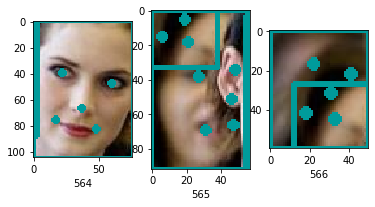

In [0]:
a = input('Number of faces in the image')
b = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()
print(b)
c = input('Index position of the image in the dataframe')
d = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()[int(c)]

index = list(training_df.loc[training_df['image'] == d].index)

try:
	fig, ax = plt.subplots(1,3)
	ax[0].imshow(training_cropped_images[index[0]])
	ax[0].set_xlabel(index[0])
	ax[1].imshow(training_cropped_images[index[1]])
	ax[1].set_xlabel(index[1])
	ax[2].imshow(training_cropped_images[index[2]])
	ax[2].set_xlabel(index[2])
except Exception as e:
	pass




In [0]:
e = input('index position to be retained from the above image')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

index position to be retained from the above image0
old array length:
48326
old dataframe length: 
48326
new array length: 
48324
new dataframe length: 
48324


Number of faces in the image3
['Walter_Mondale - _0_2589.jpg' 'Walter_Mondale - _0_8622.jpg'
 'Walter_Mondale - _0_9186.jpg' 'Walter_Mondale - _0_3980.jpg'
 'Walter_Mondale - _0_5107.jpg' 'Walter_Mondale - _0_7009.jpg'
 'Venus_Williams - _0_5879.jpg' 'Vaclav_Havel - _0_2941.jpg'
 'Tung_Chee-hwa - _0_2449.jpg' 'Trent_Lott - _0_1031.jpg'
 'Tommy_Franks - _0_6034.jpg' 'Tommy_Franks - _0_9883.jpg'
 'Tommy_Franks - _0_2102.jpg' 'Tommy_Franks - _0_1501.jpg'
 'Tommy_Franks - _0_9432.jpg' 'Tommy_Franks - _0_2338.jpg'
 'Tommy_Franks - _0_4487.jpg' 'Tommy_Franks - _0_3433.jpg'
 'Tommy_Franks - _0_2348.jpg' 'Tommy_Franks - _0_6568.jpg'
 'Tommy_Franks - _0_7416.jpg' 'Tommy_Franks - _0_4646.jpg'
 'Tommy_Franks - _0_6753.jpg' 'Tommy_Franks - _0_3040.jpg'
 'Tommy_Franks - _0_7672.jpg' 'Tommy_Franks - _0_8988.jpg'
 'Tommy_Franks - _0_3765.jpg' 'Tommy_Franks - _0_6875.jpg'
 'Tommy_Franks - _0_7971.jpg' 'Tommy_Franks - _0_8530.jpg'
 'Tommy_Franks - _0_4732.jpg' 'Tommy_Franks - _0_2177.jpg'
 'Tommy_Frank

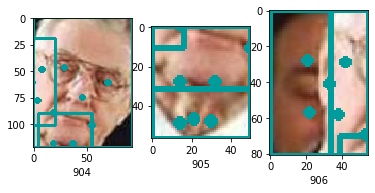

In [0]:
a = input('Number of faces in the image')
b = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()
print(b)
c = input('Index position of the image in the dataframe')
d = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()[int(c)]

index = list(training_df.loc[training_df['image'] == d].index)

try:
	fig, ax = plt.subplots(1,3)
	ax[0].imshow(training_cropped_images[index[0]])
	ax[0].set_xlabel(index[0])
	ax[1].imshow(training_cropped_images[index[1]])
	ax[1].set_xlabel(index[1])
	ax[2].imshow(training_cropped_images[index[2]])
	ax[2].set_xlabel(index[2])
except Exception as e:
	pass




In [0]:
e = input('index position to be retained from the above image')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

index position to be retained from the above image0
old array length:
48324
old dataframe length: 
48324
new array length: 
48322
new dataframe length: 
48322


Number of faces in the image3
['Walter_Mondale - _0_8622.jpg' 'Walter_Mondale - _0_9186.jpg'
 'Walter_Mondale - _0_3980.jpg' 'Walter_Mondale - _0_5107.jpg'
 'Walter_Mondale - _0_7009.jpg' 'Venus_Williams - _0_5879.jpg'
 'Vaclav_Havel - _0_2941.jpg' 'Tung_Chee-hwa - _0_2449.jpg'
 'Trent_Lott - _0_1031.jpg' 'Tommy_Franks - _0_6034.jpg'
 'Tommy_Franks - _0_9883.jpg' 'Tommy_Franks - _0_2102.jpg'
 'Tommy_Franks - _0_1501.jpg' 'Tommy_Franks - _0_9432.jpg'
 'Tommy_Franks - _0_2338.jpg' 'Tommy_Franks - _0_4487.jpg'
 'Tommy_Franks - _0_3433.jpg' 'Tommy_Franks - _0_2348.jpg'
 'Tommy_Franks - _0_6568.jpg' 'Tommy_Franks - _0_7416.jpg'
 'Tommy_Franks - _0_4646.jpg' 'Tommy_Franks - _0_6753.jpg'
 'Tommy_Franks - _0_3040.jpg' 'Tommy_Franks - _0_7672.jpg'
 'Tommy_Franks - _0_8988.jpg' 'Tommy_Franks - _0_3765.jpg'
 'Tommy_Franks - _0_6875.jpg' 'Tommy_Franks - _0_7971.jpg'
 'Tommy_Franks - _0_8530.jpg' 'Tommy_Franks - _0_4732.jpg'
 'Tommy_Franks - _0_2177.jpg' 'Tommy_Franks - _0_1137.jpg'
 'Tommy_Franks 

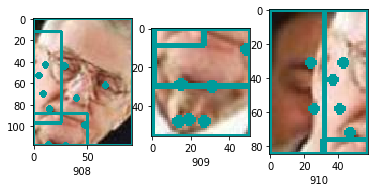

In [0]:
a = input('Number of faces in the image')
b = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()
print(b)
c = input('Index position of the image in the dataframe')
d = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()[int(c)]

index = list(training_df.loc[training_df['image'] == d].index)

try:
	fig, ax = plt.subplots(1,3)
	ax[0].imshow(training_cropped_images[index[0]])
	ax[0].set_xlabel(index[0])
	ax[1].imshow(training_cropped_images[index[1]])
	ax[1].set_xlabel(index[1])
	ax[2].imshow(training_cropped_images[index[2]])
	ax[2].set_xlabel(index[2])
except Exception as e:
	pass




In [0]:
e = input('index position to be retained from the above image')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

index position to be retained from the above image0
old array length:
48322
old dataframe length: 
48322
new array length: 
48320
new dataframe length: 
48320


Number of faces in the image3
['Walter_Mondale - _0_9186.jpg' 'Walter_Mondale - _0_3980.jpg'
 'Walter_Mondale - _0_5107.jpg' 'Walter_Mondale - _0_7009.jpg'
 'Venus_Williams - _0_5879.jpg' 'Vaclav_Havel - _0_2941.jpg'
 'Tung_Chee-hwa - _0_2449.jpg' 'Trent_Lott - _0_1031.jpg'
 'Tommy_Franks - _0_6034.jpg' 'Tommy_Franks - _0_9883.jpg'
 'Tommy_Franks - _0_2102.jpg' 'Tommy_Franks - _0_1501.jpg'
 'Tommy_Franks - _0_9432.jpg' 'Tommy_Franks - _0_2338.jpg'
 'Tommy_Franks - _0_4487.jpg' 'Tommy_Franks - _0_3433.jpg'
 'Tommy_Franks - _0_2348.jpg' 'Tommy_Franks - _0_6568.jpg'
 'Tommy_Franks - _0_7416.jpg' 'Tommy_Franks - _0_4646.jpg'
 'Tommy_Franks - _0_6753.jpg' 'Tommy_Franks - _0_3040.jpg'
 'Tommy_Franks - _0_7672.jpg' 'Tommy_Franks - _0_8988.jpg'
 'Tommy_Franks - _0_3765.jpg' 'Tommy_Franks - _0_6875.jpg'
 'Tommy_Franks - _0_7971.jpg' 'Tommy_Franks - _0_8530.jpg'
 'Tommy_Franks - _0_4732.jpg' 'Tommy_Franks - _0_2177.jpg'
 'Tommy_Franks - _0_1137.jpg' 'Tommy_Franks - _0_8955.jpg'
 'Tommy_Franks - 

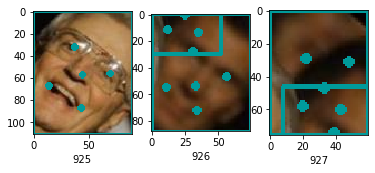

In [0]:
a = input('Number of faces in the image')
b = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()
print(b)
c = input('Index position of the image in the dataframe')
d = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()[int(c)]

index = list(training_df.loc[training_df['image'] == d].index)

try:
	fig, ax = plt.subplots(1,3)
	ax[0].imshow(training_cropped_images[index[0]])
	ax[0].set_xlabel(index[0])
	ax[1].imshow(training_cropped_images[index[1]])
	ax[1].set_xlabel(index[1])
	ax[2].imshow(training_cropped_images[index[2]])
	ax[2].set_xlabel(index[2])
except Exception as e:
	pass




In [0]:
e = input('index position to be retained from the above image')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

index position to be retained from the above image0
old array length:
48320
old dataframe length: 
48320
new array length: 
48318
new dataframe length: 
48318


Number of faces in the image3
['Walter_Mondale - _0_3980.jpg' 'Walter_Mondale - _0_5107.jpg'
 'Walter_Mondale - _0_7009.jpg' 'Venus_Williams - _0_5879.jpg'
 'Vaclav_Havel - _0_2941.jpg' 'Tung_Chee-hwa - _0_2449.jpg'
 'Trent_Lott - _0_1031.jpg' 'Tommy_Franks - _0_6034.jpg'
 'Tommy_Franks - _0_9883.jpg' 'Tommy_Franks - _0_2102.jpg'
 'Tommy_Franks - _0_1501.jpg' 'Tommy_Franks - _0_9432.jpg'
 'Tommy_Franks - _0_2338.jpg' 'Tommy_Franks - _0_4487.jpg'
 'Tommy_Franks - _0_3433.jpg' 'Tommy_Franks - _0_2348.jpg'
 'Tommy_Franks - _0_6568.jpg' 'Tommy_Franks - _0_7416.jpg'
 'Tommy_Franks - _0_4646.jpg' 'Tommy_Franks - _0_6753.jpg'
 'Tommy_Franks - _0_3040.jpg' 'Tommy_Franks - _0_7672.jpg'
 'Tommy_Franks - _0_8988.jpg' 'Tommy_Franks - _0_3765.jpg'
 'Tommy_Franks - _0_6875.jpg' 'Tommy_Franks - _0_7971.jpg'
 'Tommy_Franks - _0_8530.jpg' 'Tommy_Franks - _0_4732.jpg'
 'Tommy_Franks - _0_2177.jpg' 'Tommy_Franks - _0_1137.jpg'
 'Tommy_Franks - _0_8955.jpg' 'Tommy_Franks - _0_6033.jpg'
 'Tommy_Franks - _0

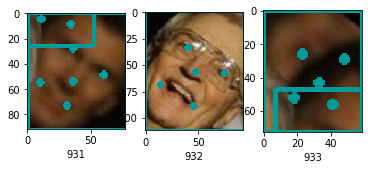

In [0]:
a = input('Number of faces in the image')
b = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()
print(b)
c = input('Index position of the image in the dataframe')
d = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()[int(c)]

index = list(training_df.loc[training_df['image'] == d].index)

try:
	fig, ax = plt.subplots(1,3)
	ax[0].imshow(training_cropped_images[index[0]])
	ax[0].set_xlabel(index[0])
	ax[1].imshow(training_cropped_images[index[1]])
	ax[1].set_xlabel(index[1])
	ax[2].imshow(training_cropped_images[index[2]])
	ax[2].set_xlabel(index[2])
except Exception as e:
	pass




In [0]:
e = input('index position to be retained from the above image')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

index position to be retained from the above image1
old array length:
48318
old dataframe length: 
48318
new array length: 
48316
new dataframe length: 
48316


Number of faces in the image3
['Walter_Mondale - _0_5107.jpg' 'Walter_Mondale - _0_7009.jpg'
 'Venus_Williams - _0_5879.jpg' 'Vaclav_Havel - _0_2941.jpg'
 'Tung_Chee-hwa - _0_2449.jpg' 'Trent_Lott - _0_1031.jpg'
 'Tommy_Franks - _0_6034.jpg' 'Tommy_Franks - _0_9883.jpg'
 'Tommy_Franks - _0_2102.jpg' 'Tommy_Franks - _0_1501.jpg'
 'Tommy_Franks - _0_9432.jpg' 'Tommy_Franks - _0_2338.jpg'
 'Tommy_Franks - _0_4487.jpg' 'Tommy_Franks - _0_3433.jpg'
 'Tommy_Franks - _0_2348.jpg' 'Tommy_Franks - _0_6568.jpg'
 'Tommy_Franks - _0_7416.jpg' 'Tommy_Franks - _0_4646.jpg'
 'Tommy_Franks - _0_6753.jpg' 'Tommy_Franks - _0_3040.jpg'
 'Tommy_Franks - _0_7672.jpg' 'Tommy_Franks - _0_8988.jpg'
 'Tommy_Franks - _0_3765.jpg' 'Tommy_Franks - _0_6875.jpg'
 'Tommy_Franks - _0_7971.jpg' 'Tommy_Franks - _0_8530.jpg'
 'Tommy_Franks - _0_4732.jpg' 'Tommy_Franks - _0_2177.jpg'
 'Tommy_Franks - _0_1137.jpg' 'Tommy_Franks - _0_8955.jpg'
 'Tommy_Franks - _0_6033.jpg' 'Tommy_Franks - _0_3819.jpg'
 'Tommy_Franks - _0_4

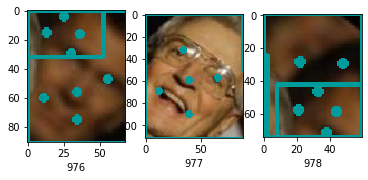

In [0]:
a = input('Number of faces in the image')
b = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()
print(b)
c = input('Index position of the image in the dataframe')
d = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()[int(c)]

index = list(training_df.loc[training_df['image'] == d].index)

try:
	fig, ax = plt.subplots(1,3)
	ax[0].imshow(training_cropped_images[index[0]])
	ax[0].set_xlabel(index[0])
	ax[1].imshow(training_cropped_images[index[1]])
	ax[1].set_xlabel(index[1])
	ax[2].imshow(training_cropped_images[index[2]])
	ax[2].set_xlabel(index[2])
except Exception as e:
	pass




In [0]:
e = input('index position to be retained from the above image')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

index position to be retained from the above image1
old array length:
48316
old dataframe length: 
48316
new array length: 
48314
new dataframe length: 
48314


Number of faces in the image3
['Walter_Mondale - _0_7009.jpg' 'Venus_Williams - _0_5879.jpg'
 'Vaclav_Havel - _0_2941.jpg' 'Tung_Chee-hwa - _0_2449.jpg'
 'Trent_Lott - _0_1031.jpg' 'Tommy_Franks - _0_6034.jpg'
 'Tommy_Franks - _0_9883.jpg' 'Tommy_Franks - _0_2102.jpg'
 'Tommy_Franks - _0_1501.jpg' 'Tommy_Franks - _0_9432.jpg'
 'Tommy_Franks - _0_2338.jpg' 'Tommy_Franks - _0_4487.jpg'
 'Tommy_Franks - _0_3433.jpg' 'Tommy_Franks - _0_2348.jpg'
 'Tommy_Franks - _0_6568.jpg' 'Tommy_Franks - _0_7416.jpg'
 'Tommy_Franks - _0_4646.jpg' 'Tommy_Franks - _0_6753.jpg'
 'Tommy_Franks - _0_3040.jpg' 'Tommy_Franks - _0_7672.jpg'
 'Tommy_Franks - _0_8988.jpg' 'Tommy_Franks - _0_3765.jpg'
 'Tommy_Franks - _0_6875.jpg' 'Tommy_Franks - _0_7971.jpg'
 'Tommy_Franks - _0_8530.jpg' 'Tommy_Franks - _0_4732.jpg'
 'Tommy_Franks - _0_2177.jpg' 'Tommy_Franks - _0_1137.jpg'
 'Tommy_Franks - _0_8955.jpg' 'Tommy_Franks - _0_6033.jpg'
 'Tommy_Franks - _0_3819.jpg' 'Tommy_Franks - _0_443.jpg'
 'Tommy_Franks - _0_4024

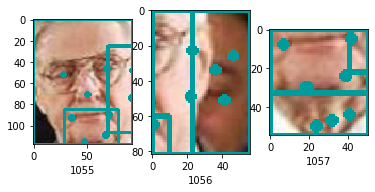

In [0]:
a = input('Number of faces in the image')
b = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()
print(b)
c = input('Index position of the image in the dataframe')
d = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()[int(c)]

index = list(training_df.loc[training_df['image'] == d].index)

try:
	fig, ax = plt.subplots(1,3)
	ax[0].imshow(training_cropped_images[index[0]])
	ax[0].set_xlabel(index[0])
	ax[1].imshow(training_cropped_images[index[1]])
	ax[1].set_xlabel(index[1])
	ax[2].imshow(training_cropped_images[index[2]])
	ax[2].set_xlabel(index[2])
except Exception as e:
	pass




In [0]:
e = input('index position to be retained from the above image')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

index position to be retained from the above image0
old array length:
48314
old dataframe length: 
48314
new array length: 
48312
new dataframe length: 
48312


Number of faces in the image3
['Tommy_Franks - _0_3819.jpg' 'Tommy_Franks - _0_443.jpg'
 'Tommy_Franks - _0_4024.jpg' 'Tommy_Franks - _0_3376.jpg'
 'Tommy_Franks - _0_5844.jpg' 'Tommy_Franks - _0_4155.jpg'
 'Tom_Daschle - _0_6120.jpg' 'Tom_Daschle - _0_6003.jpg'
 'Tom_Daschle - _0_6954.jpg' 'Tim_Henman - _0_7970.jpg'
 'Tim_Henman - _0_25.jpg' 'Tim_Henman - _0_3540.jpg'
 'Tim_Henman - _0_8877.jpg' 'Tim_Henman - _0_6935.jpg'
 'Tim_Henman - _0_9598.jpg' 'Tim_Henman - _0_1339.jpg'
 'Tim_Henman - _0_2140.jpg' 'Tim_Henman - _0_754.jpg'
 'Silvio_Berlusconi - _0_201.jpg' 'Silvio_Berlusconi - _0_5947.jpg'
 'Silvio_Berlusconi - _0_4192.jpg' 'Silvio_Berlusconi - _0_8370.jpg'
 'Silvio_Berlusconi - _0_1225.jpg' 'Silvio_Berlusconi - _0_6075.jpg'
 'Silvio_Berlusconi - _0_7303.jpg' 'Silvio_Berlusconi - _0_7922.jpg'
 'Silvio_Berlusconi - _0_1287.jpg' 'Silvio_Berlusconi - _0_1184.jpg'
 'Silvio_Berlusconi - _0_3592.jpg' 'Silvio_Berlusconi - _0_8260.jpg'
 'Silvio_Berlusconi - _0_8971.jpg' 'Silvio_Berlusco

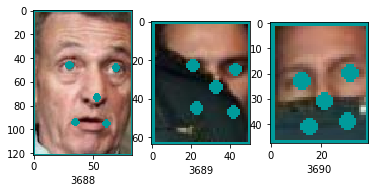

In [0]:
a = input('Number of faces in the image')
b = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()
print(b)
c = input('Index position of the image in the dataframe')
d = training_df.loc[training_df['faces_found'] == int(a)]['image'].unique()[int(c)]

index = list(training_df.loc[training_df['image'] == d].index)

try:
	fig, ax = plt.subplots(1,3)
	ax[0].imshow(training_cropped_images[index[0]])
	ax[0].set_xlabel(index[0])
	ax[1].imshow(training_cropped_images[index[1]])
	ax[1].set_xlabel(index[1])
	ax[2].imshow(training_cropped_images[index[2]])
	ax[2].set_xlabel(index[2])
except Exception as e:
	pass




In [0]:
e = input('index position to be retained from the above image')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

index position to be retained from the above image0
old array length:
48254
old dataframe length: 
48254
new array length: 
48252
new dataframe length: 
48252


['Pierce_Brosnan - _0_2734.jpg' 'Pierce_Brosnan - _0_2782.jpg'
 'Pierce_Brosnan - _0_862.jpg' 'Pierce_Brosnan - _0_6887.jpg'
 'Pierce_Brosnan - _0_4394.jpg' 'Pierce_Brosnan - _0_8808.jpg'
 'Pierce_Brosnan - _0_5932.jpg' 'Pierce_Brosnan - _0_3032.jpg'
 'Pierce_Brosnan - _0_4682.jpg' 'Pierce_Brosnan - _0_3896.jpg'
 'Pierce_Brosnan - _0_5718.jpg' 'Pierce_Brosnan - _0_5000.jpg'
 'Pierce_Brosnan - _0_776.jpg' 'Pierce_Brosnan - _0_8227.jpg'
 'Pierce_Brosnan - _0_3630.jpg' 'Pierce_Brosnan - _0_1099.jpg'
 'Pierce_Brosnan - _0_7993.jpg' 'Pierce_Brosnan - _0_7019.jpg'
 'Pierce_Brosnan - _0_5333.jpg' 'Pierce_Brosnan - _0_5110.jpg'
 'Pervez_Musharraf - _0_3083.jpg' 'Pervez_Musharraf - _0_4164.jpg'
 'Pervez_Musharraf - _0_1182.jpg' 'Pervez_Musharraf - _0_6390.jpg'
 'Paul_Wolfowitz - _0_2971.jpg' 'Paul_Wolfowitz - _0_4537.jpg'
 'Paul_Wolfowitz - _0_6046.jpg' 'Paul_Wolfowitz - _0_193.jpg'
 'Paul_Wolfowitz - _0_8494.jpg' 'Paul_Wolfowitz - _0_9613.jpg'
 'Paul_Wolfowitz - _0_2667.jpg' 'Paul_Wolfowitz - 

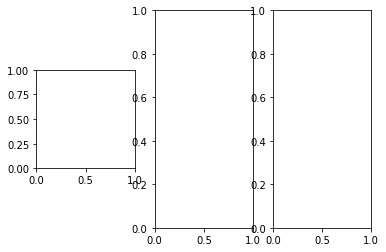

In [0]:
#a = input('Number of faces in the image')
b = training_df.loc[training_df['faces_found'] == 3]['image'].unique()
print(b)
#c = input('Index position of the image in the dataframe')
d = training_df.loc[training_df['faces_found'] == 3]['image'].unique()[0]

index = list(training_df.loc[training_df['image'] == d].index)

try:
	fig, ax = plt.subplots(1,3)
	ax[0].imshow(training_cropped_images[index[0]])
	ax[0].set_xlabel(index[0])
	ax[1].imshow(training_cropped_images[index[1]])
	ax[1].set_xlabel(index[1])
	ax[2].imshow(training_cropped_images[index[2]])
	ax[2].set_xlabel(index[2])
except Exception as e:
	pass




In [0]:
e = input('index position to be retained from the above image')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
#os.remove('cleaned_images.npy')
#os.remove('cleaned_images.csv')
#np.save('cleaned_images', training_cropped_images, allow_pickle=True)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
#training_df.to_csv('cleaned_images.csv')
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

index position to be retained from the above image0
old array length:
48120
old dataframe length: 
48120
new array length: 
48118
new dataframe length: 
48118


In [0]:
!pwd

/content/drive/My Drive/case studies 2/Final_Face_Dataset/MTCNN experiments/concatenated_training


['Pierce_Brosnan - _0_2734.jpg' 'Pierce_Brosnan - _0_862.jpg'
 'Pierce_Brosnan - _0_5932.jpg' 'Pierce_Brosnan - _0_1099.jpg'
 'Jason_Kidd - _0_1763.jpg' 'Jason_Kidd - _0_4776.jpg'
 'Jason_Kidd - _0_803.jpg' 'Dominique_de_Villepin - _0_8981.jpg'
 'Dominique_de_Villepin - _0_8260.jpg'
 'Dominique_de_Villepin - _0_6854.jpg' 'Condoleezza_Rice - _0_9967.jpg'
 'Charles_Taylor - _0_3999.jpg' 'Charles_Taylor - _0_6807.jpg'
 'Charles_Taylor - _0_7046.jpg' 'Abdullah_Gul - _0_9738.jpg']
------------------------------------------------------------------
One of this is Abdullah_Gul 
------------------------------------------------------------------
Select the 0th, 1st, or the 2nd index position in the query below
------------------------------------------------------------------


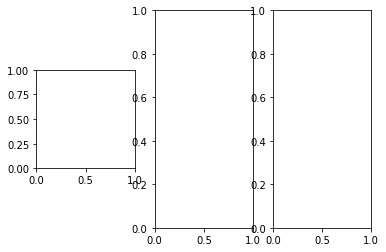

In [517]:
#a = input('Number of faces in the image')
b = training_df.loc[training_df['faces_found'] == 3]['image'].unique()
print(b)
#c = input('Index position of the image in the dataframe')
d = training_df.loc[training_df['faces_found'] == 3]['image'].unique()[14]

index = list(training_df.loc[training_df['image'] == d].index)

try:
	fig, ax = plt.subplots(1,3)
	ax[0].imshow(training_cropped_images[index[0]])
	ax[0].set_xlabel(index[0])
	ax[1].imshow(training_cropped_images[index[1]])
	ax[1].set_xlabel(index[1])
	ax[2].imshow(training_cropped_images[index[2]])
	ax[2].set_xlabel(index[2])
  
except Exception as e:
	pass
print('------------------------------------------------------------------')
print('One of this is ' + training_df['label'][index[0]])
print('------------------------------------------------------------------')
print('Select the 0th, 1st, or the 2nd index position in the query below')
print('------------------------------------------------------------------')


In [515]:
e = input('index position to be retained from the above image')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
#os.remove('cleaned_images.npy')
#os.remove('cleaned_images.csv')
#np.save('cleaned_images', training_cropped_images, allow_pickle=True)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
#training_df.to_csv('cleaned_images.csv')
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

index position to be retained from the above image0
old array length:
47072
old dataframe length: 
47072
new array length: 
47070
new dataframe length: 
47070


In [533]:
training_df.loc[training_df['faces_found'] == 3].loc[training_df.loc[training_df['faces_found'] == 3]['image'] == 'Pierce_Brosnan - _0_2734.jpg']

,Unnamed: 0,Unnamed: 0.1,label,image,faces_found
10996,10996,11222,Pierce_Brosnan,Pierce_Brosnan - _0_2734.jpg,3
10997,10997,11223,Pierce_Brosnan,Pierce_Brosnan - _0_2734.jpg,3
10998,10998,11224,Pierce_Brosnan,Pierce_Brosnan - _0_2734.jpg,3


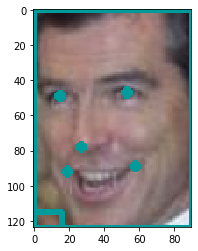

In [535]:
plt.imshow(training_cropped_images[10997])

In [536]:
index = [10996, 10998]
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
training_cropped_images = np.delete(training_cropped_images, index)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))
del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))


old array length:
47070
old dataframe length: 
47070
new array length: 
47068
new dataframe length: 
47068


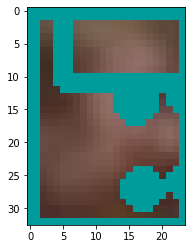

In [541]:
index = list(training_df.loc[training_df['faces_found'] == 3].loc[training_df.loc[training_df['faces_found'] == 3]['image'] == 'Pierce_Brosnan - _0_862.jpg'].index)
#plt.imshow(training_cropped_images[index[0]])
#plt.imshow(training_cropped_images[index[1]])
plt.imshow(training_cropped_images[index[2]])

In [542]:
del index[0]
index

[10999, 11000]

In [543]:
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
training_cropped_images = np.delete(training_cropped_images, index)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))
del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))


old array length:
47068
old dataframe length: 
47068
new array length: 
47066
new dataframe length: 
47066


In [544]:
training_df.loc[training_df['faces_found'] == 3]

,Unnamed: 0,Unnamed: 0.1,label,image,faces_found
11067,11071,11305,Pierce_Brosnan,Pierce_Brosnan - _0_5932.jpg,3
11068,11072,11306,Pierce_Brosnan,Pierce_Brosnan - _0_5932.jpg,3
11069,11073,11307,Pierce_Brosnan,Pierce_Brosnan - _0_5932.jpg,3
11193,11197,11447,Pierce_Brosnan,Pierce_Brosnan - _0_1099.jpg,3
11194,11198,11448,Pierce_Brosnan,Pierce_Brosnan - _0_1099.jpg,3
11195,11199,11449,Pierce_Brosnan,Pierce_Brosnan - _0_1099.jpg,3
29446,29464,30290,Jason_Kidd,Jason_Kidd - _0_1763.jpg,3
29447,29465,30291,Jason_Kidd,Jason_Kidd - _0_1763.jpg,3
29448,29466,30292,Jason_Kidd,Jason_Kidd - _0_1763.jpg,3
29488,29520,30346,Jason_Kidd,Jason_Kidd - _0_4776.jpg,3


In [0]:
index = list(training_df.loc[training_df['faces_found'] == 3].loc[training_df.loc[training_df['faces_found'] == 3]['image'] == 'Pierce_Brosnan - _0_5932.jpg'].index)

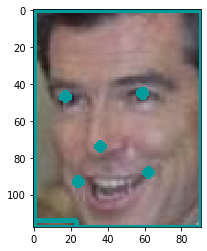

In [547]:
plt.imshow(training_cropped_images[index[1]])

In [548]:
del index[1]
index

[11067, 11069]

In [549]:
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
training_cropped_images = np.delete(training_cropped_images, index)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))
del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))


old array length:
47066
old dataframe length: 
47066
new array length: 
47064
new dataframe length: 
47064


In [550]:
training_df.loc[training_df['faces_found'] == 3]

,Unnamed: 0,Unnamed: 0.1,label,image,faces_found
11191,11197,11447,Pierce_Brosnan,Pierce_Brosnan - _0_1099.jpg,3
11192,11198,11448,Pierce_Brosnan,Pierce_Brosnan - _0_1099.jpg,3
11193,11199,11449,Pierce_Brosnan,Pierce_Brosnan - _0_1099.jpg,3
29444,29464,30290,Jason_Kidd,Jason_Kidd - _0_1763.jpg,3
29445,29465,30291,Jason_Kidd,Jason_Kidd - _0_1763.jpg,3
29446,29466,30292,Jason_Kidd,Jason_Kidd - _0_1763.jpg,3
29486,29520,30346,Jason_Kidd,Jason_Kidd - _0_4776.jpg,3
29487,29521,30347,Jason_Kidd,Jason_Kidd - _0_4776.jpg,3
29488,29522,30348,Jason_Kidd,Jason_Kidd - _0_4776.jpg,3
29509,29543,30369,Jason_Kidd,Jason_Kidd - _0_803.jpg,3


In [0]:
index = list(training_df.loc[training_df['faces_found'] == 3].loc[training_df.loc[training_df['faces_found'] == 3]['image'] == 'Pierce_Brosnan - _0_1099.jpg'].index)

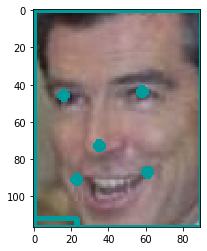

In [553]:
plt.imshow(training_cropped_images[index[1]])

In [554]:
del index[1]
index

[11191, 11193]

In [555]:
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
training_cropped_images = np.delete(training_cropped_images, index)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))
del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))


old array length:
47064
old dataframe length: 
47064
new array length: 
47062
new dataframe length: 
47062


In [556]:
training_df.loc[training_df['faces_found'] == 3]

,Unnamed: 0,Unnamed: 0.1,label,image,faces_found
29442,29464,30290,Jason_Kidd,Jason_Kidd - _0_1763.jpg,3
29443,29465,30291,Jason_Kidd,Jason_Kidd - _0_1763.jpg,3
29444,29466,30292,Jason_Kidd,Jason_Kidd - _0_1763.jpg,3
29484,29520,30346,Jason_Kidd,Jason_Kidd - _0_4776.jpg,3
29485,29521,30347,Jason_Kidd,Jason_Kidd - _0_4776.jpg,3
29486,29522,30348,Jason_Kidd,Jason_Kidd - _0_4776.jpg,3
29507,29543,30369,Jason_Kidd,Jason_Kidd - _0_803.jpg,3
29508,29544,30370,Jason_Kidd,Jason_Kidd - _0_803.jpg,3
29509,29545,30371,Jason_Kidd,Jason_Kidd - _0_803.jpg,3
38491,38723,39549,Dominique_de_Villepin,Dominique_de_Villepin - _0_8981.jpg,3


In [0]:
index = list(training_df.loc[training_df['faces_found'] == 3].loc[training_df.loc[training_df['faces_found'] == 3]['image'] == 'Jason_Kidd - _0_1763.jpg'].index)

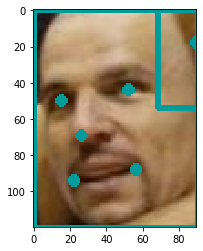

In [559]:
plt.imshow(training_cropped_images[index[1]])

In [560]:
del index[1]
index

[29442, 29444]

In [561]:
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
training_cropped_images = np.delete(training_cropped_images, index)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))
del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))


old array length:
47062
old dataframe length: 
47062
new array length: 
47060
new dataframe length: 
47060


In [562]:
training_df.loc[training_df['faces_found'] == 3]

,Unnamed: 0,Unnamed: 0.1,label,image,faces_found
29482,29520,30346,Jason_Kidd,Jason_Kidd - _0_4776.jpg,3
29483,29521,30347,Jason_Kidd,Jason_Kidd - _0_4776.jpg,3
29484,29522,30348,Jason_Kidd,Jason_Kidd - _0_4776.jpg,3
29505,29543,30369,Jason_Kidd,Jason_Kidd - _0_803.jpg,3
29506,29544,30370,Jason_Kidd,Jason_Kidd - _0_803.jpg,3
29507,29545,30371,Jason_Kidd,Jason_Kidd - _0_803.jpg,3
38489,38723,39549,Dominique_de_Villepin,Dominique_de_Villepin - _0_8981.jpg,3
38490,38724,39550,Dominique_de_Villepin,Dominique_de_Villepin - _0_8981.jpg,3
38491,38725,39551,Dominique_de_Villepin,Dominique_de_Villepin - _0_8981.jpg,3
38569,38805,39631,Dominique_de_Villepin,Dominique_de_Villepin - _0_8260.jpg,3


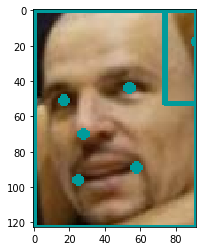

In [564]:
index = list(training_df.loc[training_df['faces_found'] == 3].loc[training_df.loc[training_df['faces_found'] == 3]['image'] == 'Jason_Kidd - _0_4776.jpg'].index)

plt.imshow(training_cropped_images[index[1]])

In [565]:
del index[1]
index

print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
training_cropped_images = np.delete(training_cropped_images, index)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))
del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))


old array length:
47060
old dataframe length: 
47060
new array length: 
47058
new dataframe length: 
47058


In [566]:
training_df.loc[training_df['faces_found'] == 3]

,Unnamed: 0,Unnamed: 0.1,label,image,faces_found
29503,29543,30369,Jason_Kidd,Jason_Kidd - _0_803.jpg,3
29504,29544,30370,Jason_Kidd,Jason_Kidd - _0_803.jpg,3
29505,29545,30371,Jason_Kidd,Jason_Kidd - _0_803.jpg,3
38487,38723,39549,Dominique_de_Villepin,Dominique_de_Villepin - _0_8981.jpg,3
38488,38724,39550,Dominique_de_Villepin,Dominique_de_Villepin - _0_8981.jpg,3
38489,38725,39551,Dominique_de_Villepin,Dominique_de_Villepin - _0_8981.jpg,3
38567,38805,39631,Dominique_de_Villepin,Dominique_de_Villepin - _0_8260.jpg,3
38568,38806,39632,Dominique_de_Villepin,Dominique_de_Villepin - _0_8260.jpg,3
38569,38807,39633,Dominique_de_Villepin,Dominique_de_Villepin - _0_8260.jpg,3
38621,38859,39685,Dominique_de_Villepin,Dominique_de_Villepin - _0_6854.jpg,3


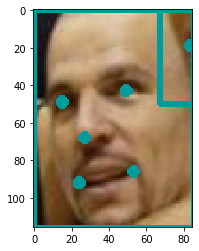

In [568]:
index = list(training_df.loc[training_df['faces_found'] == 3].loc[training_df.loc[training_df['faces_found'] == 3]['image'] == 'Jason_Kidd - _0_803.jpg'].index)

plt.imshow(training_cropped_images[index[1]])

In [569]:
del index[1]
index

print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
training_cropped_images = np.delete(training_cropped_images, index)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))
del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))


old array length:
47058
old dataframe length: 
47058
new array length: 
47056
new dataframe length: 
47056


In [571]:
training_df.loc[training_df['faces_found'] == 3]

,Unnamed: 0,Unnamed: 0.1,label,image,faces_found
38485,38723,39549,Dominique_de_Villepin,Dominique_de_Villepin - _0_8981.jpg,3
38486,38724,39550,Dominique_de_Villepin,Dominique_de_Villepin - _0_8981.jpg,3
38487,38725,39551,Dominique_de_Villepin,Dominique_de_Villepin - _0_8981.jpg,3
38565,38805,39631,Dominique_de_Villepin,Dominique_de_Villepin - _0_8260.jpg,3
38566,38806,39632,Dominique_de_Villepin,Dominique_de_Villepin - _0_8260.jpg,3
38567,38807,39633,Dominique_de_Villepin,Dominique_de_Villepin - _0_8260.jpg,3
38619,38859,39685,Dominique_de_Villepin,Dominique_de_Villepin - _0_6854.jpg,3
38620,38860,39686,Dominique_de_Villepin,Dominique_de_Villepin - _0_6854.jpg,3
38621,38861,39687,Dominique_de_Villepin,Dominique_de_Villepin - _0_6854.jpg,3
39725,39983,40809,Condoleezza_Rice,Condoleezza_Rice - _0_9967.jpg,3


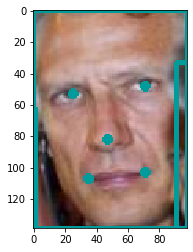

In [575]:
index = list(training_df.loc[training_df['faces_found'] == 3].loc[training_df.loc[training_df['faces_found'] == 3]['image'] == 'Dominique_de_Villepin - _0_8981.jpg'].index)

plt.imshow(training_cropped_images[index[1]])

In [576]:
del index[1]
index

print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
training_cropped_images = np.delete(training_cropped_images, index)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))
del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))


old array length:
47056
old dataframe length: 
47056
new array length: 
47054
new dataframe length: 
47054


In [577]:
training_df.loc[training_df['faces_found'] == 3]

,Unnamed: 0,Unnamed: 0.1,label,image,faces_found
38563,38805,39631,Dominique_de_Villepin,Dominique_de_Villepin - _0_8260.jpg,3
38564,38806,39632,Dominique_de_Villepin,Dominique_de_Villepin - _0_8260.jpg,3
38565,38807,39633,Dominique_de_Villepin,Dominique_de_Villepin - _0_8260.jpg,3
38617,38859,39685,Dominique_de_Villepin,Dominique_de_Villepin - _0_6854.jpg,3
38618,38860,39686,Dominique_de_Villepin,Dominique_de_Villepin - _0_6854.jpg,3
38619,38861,39687,Dominique_de_Villepin,Dominique_de_Villepin - _0_6854.jpg,3
39723,39983,40809,Condoleezza_Rice,Condoleezza_Rice - _0_9967.jpg,3
39724,39984,40810,Condoleezza_Rice,Condoleezza_Rice - _0_9967.jpg,3
39725,39985,40811,Condoleezza_Rice,Condoleezza_Rice - _0_9967.jpg,3
40317,40599,41425,Charles_Taylor,Charles_Taylor - _0_3999.jpg,3


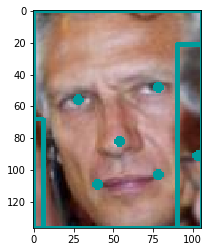

In [579]:
index = list(training_df.loc[training_df['faces_found'] == 3].loc[training_df.loc[training_df['faces_found'] == 3]['image'] == 'Dominique_de_Villepin - _0_8260.jpg'].index)

plt.imshow(training_cropped_images[index[1]])

In [580]:
del index[1]
index

print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
training_cropped_images = np.delete(training_cropped_images, index)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))
del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))


old array length:
47054
old dataframe length: 
47054
new array length: 
47052
new dataframe length: 
47052


In [581]:
training_df.loc[training_df['faces_found'] == 3]

,Unnamed: 0,Unnamed: 0.1,label,image,faces_found
38615,38859,39685,Dominique_de_Villepin,Dominique_de_Villepin - _0_6854.jpg,3
38616,38860,39686,Dominique_de_Villepin,Dominique_de_Villepin - _0_6854.jpg,3
38617,38861,39687,Dominique_de_Villepin,Dominique_de_Villepin - _0_6854.jpg,3
39721,39983,40809,Condoleezza_Rice,Condoleezza_Rice - _0_9967.jpg,3
39722,39984,40810,Condoleezza_Rice,Condoleezza_Rice - _0_9967.jpg,3
39723,39985,40811,Condoleezza_Rice,Condoleezza_Rice - _0_9967.jpg,3
40315,40599,41425,Charles_Taylor,Charles_Taylor - _0_3999.jpg,3
40316,40600,41426,Charles_Taylor,Charles_Taylor - _0_3999.jpg,3
40317,40601,41427,Charles_Taylor,Charles_Taylor - _0_3999.jpg,3
40439,40735,41561,Charles_Taylor,Charles_Taylor - _0_6807.jpg,3


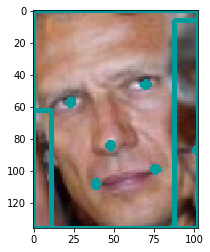

In [584]:
index = list(training_df.loc[training_df['faces_found'] == 3].loc[training_df.loc[training_df['faces_found'] == 3]['image'] == 'Dominique_de_Villepin - _0_6854.jpg'].index)

plt.imshow(training_cropped_images[index[2]])

In [585]:
del index[2]
index

[38615, 38616]

In [586]:
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
training_cropped_images = np.delete(training_cropped_images, index)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))
del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))


old array length:
47052
old dataframe length: 
47052
new array length: 
47050
new dataframe length: 
47050


In [587]:
training_df.loc[training_df['faces_found'] == 3]

,Unnamed: 0,Unnamed: 0.1,label,image,faces_found
39719,39983,40809,Condoleezza_Rice,Condoleezza_Rice - _0_9967.jpg,3
39720,39984,40810,Condoleezza_Rice,Condoleezza_Rice - _0_9967.jpg,3
39721,39985,40811,Condoleezza_Rice,Condoleezza_Rice - _0_9967.jpg,3
40313,40599,41425,Charles_Taylor,Charles_Taylor - _0_3999.jpg,3
40314,40600,41426,Charles_Taylor,Charles_Taylor - _0_3999.jpg,3
40315,40601,41427,Charles_Taylor,Charles_Taylor - _0_3999.jpg,3
40437,40735,41561,Charles_Taylor,Charles_Taylor - _0_6807.jpg,3
40438,40736,41562,Charles_Taylor,Charles_Taylor - _0_6807.jpg,3
40439,40737,41563,Charles_Taylor,Charles_Taylor - _0_6807.jpg,3
40440,40738,41564,Charles_Taylor,Charles_Taylor - _0_7046.jpg,3


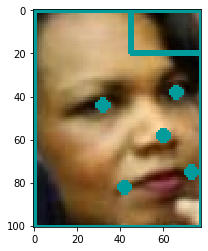

In [589]:
index = list(training_df.loc[training_df['faces_found'] == 3].loc[training_df.loc[training_df['faces_found'] == 3]['image'] == 'Condoleezza_Rice - _0_9967.jpg'].index)

plt.imshow(training_cropped_images[index[1]])

In [590]:
del index[1]
index

print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
training_cropped_images = np.delete(training_cropped_images, index)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))
del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))


old array length:
47050
old dataframe length: 
47050
new array length: 
47048
new dataframe length: 
47048


In [591]:
training_df.loc[training_df['faces_found'] == 3]

,Unnamed: 0,Unnamed: 0.1,label,image,faces_found
40311,40599,41425,Charles_Taylor,Charles_Taylor - _0_3999.jpg,3
40312,40600,41426,Charles_Taylor,Charles_Taylor - _0_3999.jpg,3
40313,40601,41427,Charles_Taylor,Charles_Taylor - _0_3999.jpg,3
40435,40735,41561,Charles_Taylor,Charles_Taylor - _0_6807.jpg,3
40436,40736,41562,Charles_Taylor,Charles_Taylor - _0_6807.jpg,3
40437,40737,41563,Charles_Taylor,Charles_Taylor - _0_6807.jpg,3
40438,40738,41564,Charles_Taylor,Charles_Taylor - _0_7046.jpg,3
40439,40739,41565,Charles_Taylor,Charles_Taylor - _0_7046.jpg,3
40440,40740,41566,Charles_Taylor,Charles_Taylor - _0_7046.jpg,3
46671,47141,47967,Abdullah_Gul,Abdullah_Gul - _0_9738.jpg,3


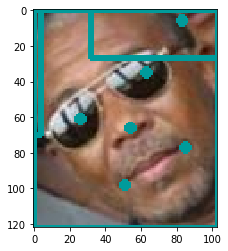

In [593]:
index = list(training_df.loc[training_df['faces_found'] == 3].loc[training_df.loc[training_df['faces_found'] == 3]['image'] == 'Charles_Taylor - _0_3999.jpg'].index)

plt.imshow(training_cropped_images[index[1]])


In [594]:
del index[1]
index

print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
training_cropped_images = np.delete(training_cropped_images, index)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))
del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))


old array length:
47048
old dataframe length: 
47048
new array length: 
47046
new dataframe length: 
47046


In [595]:
training_df.loc[training_df['faces_found'] == 3]

,Unnamed: 0,Unnamed: 0.1,label,image,faces_found
40433,40735,41561,Charles_Taylor,Charles_Taylor - _0_6807.jpg,3
40434,40736,41562,Charles_Taylor,Charles_Taylor - _0_6807.jpg,3
40435,40737,41563,Charles_Taylor,Charles_Taylor - _0_6807.jpg,3
40436,40738,41564,Charles_Taylor,Charles_Taylor - _0_7046.jpg,3
40437,40739,41565,Charles_Taylor,Charles_Taylor - _0_7046.jpg,3
40438,40740,41566,Charles_Taylor,Charles_Taylor - _0_7046.jpg,3
46669,47141,47967,Abdullah_Gul,Abdullah_Gul - _0_9738.jpg,3
46670,47142,47968,Abdullah_Gul,Abdullah_Gul - _0_9738.jpg,3
46671,47143,47969,Abdullah_Gul,Abdullah_Gul - _0_9738.jpg,3


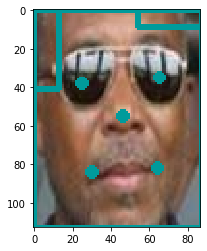

In [597]:
index = list(training_df.loc[training_df['faces_found'] == 3].loc[training_df.loc[training_df['faces_found'] == 3]['image'] == 'Charles_Taylor - _0_6807.jpg'].index)

plt.imshow(training_cropped_images[index[1]])


In [598]:
del index[1]
index

print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
training_cropped_images = np.delete(training_cropped_images, index)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))
del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))


old array length:
47046
old dataframe length: 
47046
new array length: 
47044
new dataframe length: 
47044


In [599]:
training_df.loc[training_df['faces_found'] == 3]

,Unnamed: 0,Unnamed: 0.1,label,image,faces_found
40434,40738,41564,Charles_Taylor,Charles_Taylor - _0_7046.jpg,3
40435,40739,41565,Charles_Taylor,Charles_Taylor - _0_7046.jpg,3
40436,40740,41566,Charles_Taylor,Charles_Taylor - _0_7046.jpg,3
46667,47141,47967,Abdullah_Gul,Abdullah_Gul - _0_9738.jpg,3
46668,47142,47968,Abdullah_Gul,Abdullah_Gul - _0_9738.jpg,3
46669,47143,47969,Abdullah_Gul,Abdullah_Gul - _0_9738.jpg,3


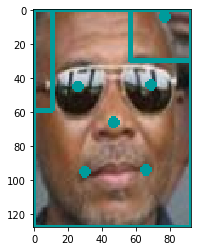

In [601]:
index = list(training_df.loc[training_df['faces_found'] == 3].loc[training_df.loc[training_df['faces_found'] == 3]['image'] == 'Charles_Taylor - _0_7046.jpg'].index)

plt.imshow(training_cropped_images[index[1]])


In [602]:
del index[1]
index

print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
training_cropped_images = np.delete(training_cropped_images, index)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))
del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))


old array length:
47044
old dataframe length: 
47044
new array length: 
47042
new dataframe length: 
47042


In [603]:
training_df.loc[training_df['faces_found'] == 3]

,Unnamed: 0,Unnamed: 0.1,label,image,faces_found
46665,47141,47967,Abdullah_Gul,Abdullah_Gul - _0_9738.jpg,3
46666,47142,47968,Abdullah_Gul,Abdullah_Gul - _0_9738.jpg,3
46667,47143,47969,Abdullah_Gul,Abdullah_Gul - _0_9738.jpg,3


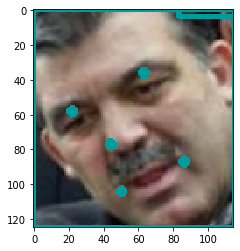

In [605]:
index = list(training_df.loc[training_df['faces_found'] == 3].loc[training_df.loc[training_df['faces_found'] == 3]['image'] == 'Abdullah_Gul - _0_9738.jpg'].index)

plt.imshow(training_cropped_images[index[1]])


In [606]:
del index[1]
index

print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
training_cropped_images = np.delete(training_cropped_images, index)
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))
del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))


old array length:
47042
old dataframe length: 
47042
new array length: 
47040
new dataframe length: 
47040


In [607]:
training_df.loc[training_df['faces_found'] == 3]

,Unnamed: 0,Unnamed: 0.1,label,image,faces_found


In [0]:
del training_df['Unnamed: 0.1']

In [609]:
!ls

cleaned_images.csv  cropped_images.npy		 python_delete_3_faces.py
cleaned_images.npy  cropped_training_images.csv


In [0]:
os.remove('cleaned_images.npy')
os.remove('cleaned_images.csv')
np.save('cleaned_images', training_cropped_images, allow_pickle=True)
training_df.to_csv('cleaned_images.csv')

# Steps taken to clean images with 2 faces detected in it

In [0]:
os.remove('cleaned_images.npy')
os.remove('cleaned_images.csv')
np.save('cleaned_images', training_cropped_images, allow_pickle=True)
training_df.to_csv('cleaned_images.csv')

In [0]:
#a = input('Number of faces in the image')
b = training_df.loc[training_df['faces_found'] == 2]['image'].unique()
print(b)
#c = input('Index position of the image in the dataframe')
d = training_df.loc[training_df['faces_found'] == 2]['image'].unique()[13]

index = list(training_df.loc[training_df['image'] == d].index)

try:
	fig, ax = plt.subplots(1,2)
	ax[0].imshow(training_cropped_images[index[0]])
	ax[0].set_xlabel(index[0])
	ax[1].imshow(training_cropped_images[index[1]])
	ax[1].set_xlabel(index[1])
	
  
except Exception as e:
	pass
print('------------------------------------------------------------------')
print('One of this is ' + training_df['label'][index[0]])
print('------------------------------------------------------------------')
print('Select the 0th or the 1st index position in the query below')
print('------------------------------------------------------------------')

In [0]:
e = input('index position to be retained from the above image')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
#os.remove('cleaned_images.npy')
#os.remove('cleaned_images.csv')
#np.save('cleaned_images', training_cropped_images, allow_pickle=True)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
#training_df.to_csv('cleaned_images.csv')
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))